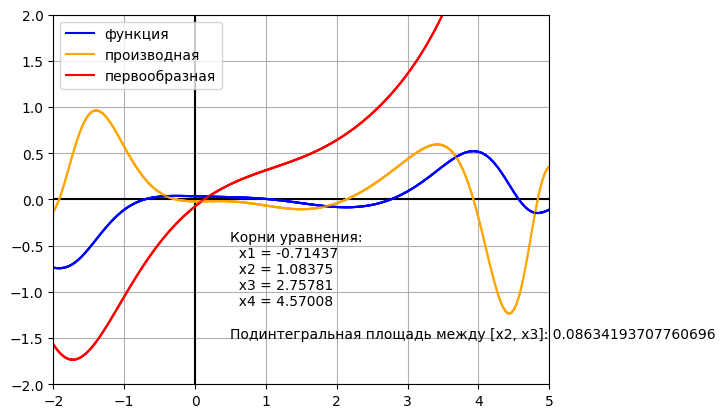

In [ ]:
#подключение библиотек
import matplotlib.pyplot as plt
from math import *
import numpy as np

#ввод исходных данных
N=4
a=-2
b=5
step=0.01
epsilon=0.0001
n=100

#задание функции
def f(x):
    arg=(x**3-N*x**2+x-1)/20
    return ((cos(arg))**4+N*(((x-1)/10)**2))-1+(x/20)

#поиск корней методом дихотомии
def met_dih(a, b):
    x = (a + b) / 2
    arr=[]
    while abs(f(x)) >= epsilon:
        x = (a + b) / 2
        a, b = (a, x) if f(a) * f(x) < 0 else (x, b)
        arr.append(x)
    return (a + b) / 2


#вычесление интеграла
def trapezoidal(a, b):

	h = float(b - a)/n
	result = 0.5*(f(a) + f(b))
	for i in range(1, n):
		result += f(a + i*h)
	result *= h
	return result

#вычисленная производная
def derivative(x):
    return -0.03 + 0.08*x - 4.0*cos((x**3 - 4*x**2 + x - 1)/20)**3*(0.05 + 0.15*x**2 - 0.4*x)*sin((x**3 - 4*x**2 + x - 1)/20)

#вычесленная первообразная
def inter(x):
    arg1=((x**3-4*x**2+x-1)/10)
    return ((sin(arg1)+(sin(arg1)/2))/2)+x**3/75+((54*x-1.5*x**2)/100)

#поиск всех существующих корней
def get_roots():
    roots=[]
    x=a
    while x<b:
        if(f(x)*f(x+step)<=0):
           roots.append(met_dih(x,x+step))
        x+=step
    return roots

#графика
def main():
    plt.xlim([a, b])
    plt.ylim([-2, 2])
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    x=a
    while x < b:
        plot_function, = plt.plot([x, x + step], [f(x), f(x + step)], 'b')
        plot_derivative, = plt.plot([x, x + step], [derivative(x), derivative(x + step)], 'orange')
        plot_integral, = plt.plot([x, x + step], [inter(x), inter(x + step)], 'red')
        x+=step
        plt.legend([plot_function, plot_derivative,plot_integral], ['функция', 'производная','первообразная'], loc='upper left')
        information_text = 'Корни уравнения:\n';
        roots = get_roots()
        roots2=f(x)
    num = 1
    for root in roots:
            information_text += '  x%d = %.5f\n' % (num, root);
            num += 1
    information_text += '\nПодинтегральная площадь между [x2, x3]: ' + str(abs(trapezoidal(roots[1], roots[2])))
    plt.text(0.5, -1.5, information_text)
    plt.grid(True)
    plt.show()
main()




